In [9]:
# Install a pip package in the current Jupyter kernel
import sys
# !{sys.executable} -m pip install lightkurve

In [1]:
import lightkurve as lk

# Kepler 10

/home/ubuntu/anaconda3/lib/python3.8/site-packages/lightkurve/search.py:228: LightkurveWarning: Warning: 16 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn('Warning: {} files available to download. '


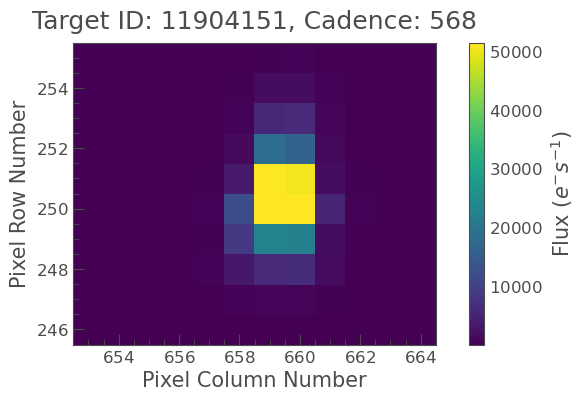

In [17]:
pixels = lk.search_targetpixelfile("KIC 11904151").download()
pixels.plot()

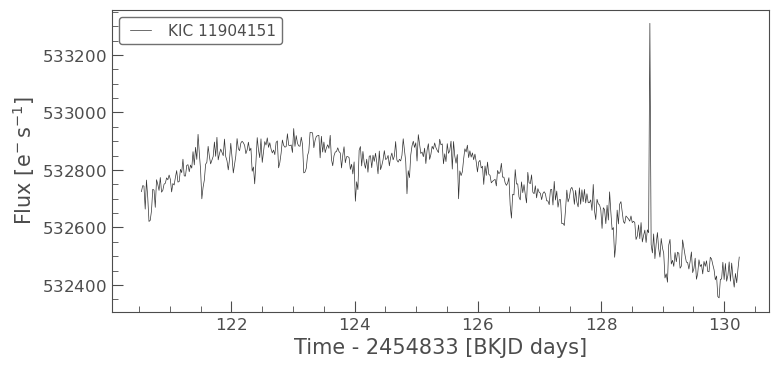

In [18]:
lightcurve = pixels.to_lightcurve()
lightcurve.plot()

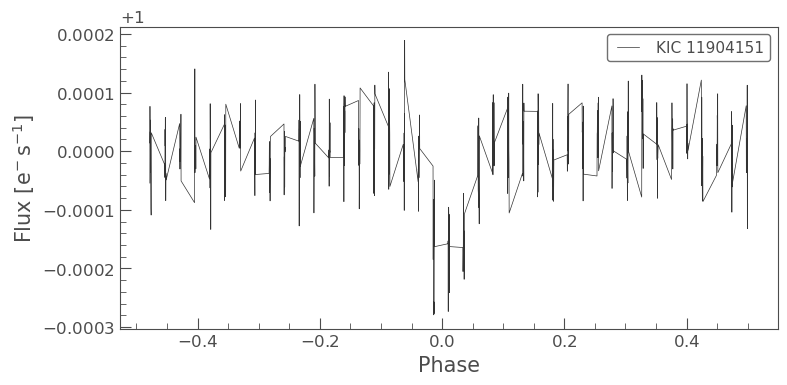

In [19]:
exoplanet = lightcurve.flatten().remove_outliers().fold(period=0.838)
exoplanet.plot()

# TESS

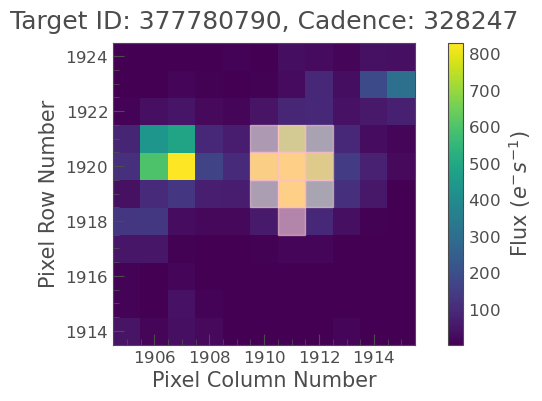

In [2]:
pixels = lk.search_targetpixelfile(target="TIC 377780790", mission="TESS").download()
pixels.plot(aperture_mask=pixels.pipeline_mask)

In [3]:
print("sector: " + str(pixels.sector))
print("row: " + str(pixels.row))
print("column: " + str(pixels.column))
print("aperture: " + str(pixels.pipeline_mask))

sector: 14
row: 1914
column: 1905
aperture: [[False False False False False False False False False False False]
 [False False False False False False False False False False False]
 [False False False False False False False False False False False]
 [False False False False False False False False False False False]
 [False False False False False False  True False False False False]
 [False False False False False  True  True  True False False False]
 [False False False False False  True  True  True False False False]
 [False False False False False  True  True  True False False False]
 [False False False False False False False False False False False]
 [False False False False False False False False False False False]
 [False False False False False False False False False False False]]


In [5]:
aperture_list = []
current_row = pixels.row
for row in pixels.pipeline_mask:
    current_column = pixels.column
    for cell in row:
        if cell == True:
            aperture_list.append([current_row, current_column])
        current_column = current_column + 1
    current_row = current_row + 1
print(aperture_list)

[[1918, 1911], [1919, 1910], [1919, 1911], [1919, 1912], [1920, 1910], [1920, 1911], [1920, 1912], [1921, 1910], [1921, 1911], [1921, 1912]]


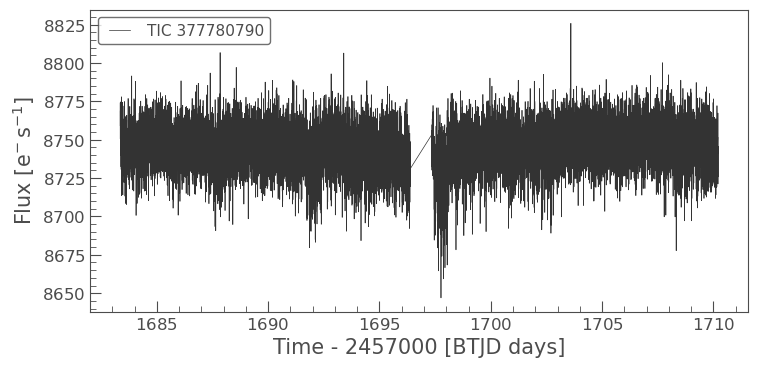

In [22]:
lightcurve = pixels.to_lightcurve()
lightcurve.plot()

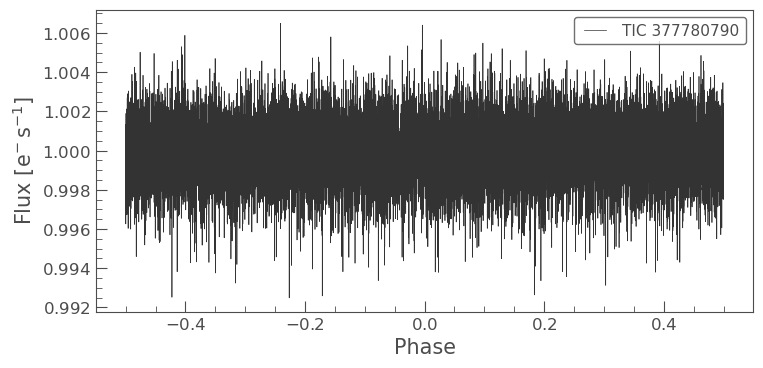

In [23]:
exoplanet = lightcurve.flatten().remove_outliers().fold(period=0.838)
exoplanet.plot()